# Requirements

In [5]:
pip install -r Requirement.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 78.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 67.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


The following code is to obtain the Hibor data from two sources, namely:
1. HKMA
2. Hang Seng Bank


In [1]:
url1="https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily?segment=hibor.fixing"
url2="https://rbwm-api.hsbc.com.hk/pws-hk-hase-rates-papi-prod-proxy/v1/historical-onemonth-hibor?year=##YYYY##&month=##MM##"

date = []
hibor = []
'''
#Previous Data
import urllib.request as req, json
res = req.urlopen(url1)
rec = json.loads(res.read())
rec = rec['result']['records']
for r in rec:
  date.append(r['end_of_day']) 
  hibor.append(r['ir_1m'])
'''
#current month
import datetime
import urllib.request as req, json
year = datetime.datetime.now().year
month = datetime.datetime.now().month
for y in range(2018,2022+1):
    for m in range(1,12+1):
        if not (year==y and month<m):
            url2_u = url2.replace('##YYYY##',str(y))
            url2_u = url2_u.replace('##MM##',str(m).zfill(2))
            res = req.urlopen(url2_u)
            rec = json.loads(res.read())
            rec = rec['historicalOneMonthHibor']
            for r in rec:
                date.append(r['rateDate'])
                hibor.append(r['haseHibor'])

import pandas as pd
df = {'Hibor':hibor,'Date':date}
df = pd.DataFrame(df)
df['Date']=pd.to_datetime(df['Date'])
df['Hibor']=pd.to_numeric(df['Hibor'])
df = df.sort_values('Date',ignore_index=True)
#df.to_csv("data.csv")
#from google.colab import files
#files.download("data.csv")

In [2]:
pip install backtesting

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(df.to_string())

      Hibor       Date
0     1.200 2018-01-02
1     1.100 2018-01-03
2     1.020 2018-01-04
3     0.990 2018-01-05
4     0.950 2018-01-08
5     0.910 2018-01-09
6     0.910 2018-01-10
7     0.910 2018-01-11
8     0.910 2018-01-12
9     0.930 2018-01-15
10    0.910 2018-01-16
11    0.880 2018-01-17
12    0.920 2018-01-18
13    0.900 2018-01-19
14    0.910 2018-01-22
15    0.910 2018-01-23
16    0.910 2018-01-24
17    0.910 2018-01-25
18    0.910 2018-01-26
19    0.910 2018-01-29
20    0.940 2018-01-30
21    0.910 2018-01-31
22    0.900 2018-02-01
23    0.900 2018-02-02
24    0.900 2018-02-05
25    0.870 2018-02-06
26    0.830 2018-02-07
27    0.780 2018-02-08
28    0.740 2018-02-09
29    0.730 2018-02-12
30    0.730 2018-02-13
31    0.730 2018-02-14
32    0.710 2018-02-15
33    0.710 2018-02-20
34    0.700 2018-02-21
35    0.690 2018-02-22
36    0.690 2018-02-23
37    0.690 2018-02-26
38    0.690 2018-02-27
39    0.690 2018-02-28
40    0.720 2018-03-01
41    0.670 2018-03-02
42    0.690

In [7]:
url3='https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-monetary-base?pagesize=1000'
res = req.urlopen(url3)
rec = json.loads(res.read())
rec = rec['result']['records']
eod = []
balance = []
for r in rec:
  eod.append(r['end_of_date'])
  balance.append(r['aggr_balance_af_disc_win'])
eod, balance
df1 = {'Balance':balance,'Date':eod}
df1 = pd.DataFrame(df1)
df1['Date']=pd.to_datetime(df1['Date'])
df1['Balance']=pd.to_numeric(df1['Balance'])
df1 = df1.sort_values('Date',ignore_index=True)
df1

,Balance,Date
0,76731,2018-09-27
1,96453,2018-09-28
2,76402,2018-10-02
3,76576,2018-10-03
4,80116,2018-10-04
...,...,...
995,120894,2022-10-10
996,119324,2022-10-11
997,120463,2022-10-12
998,118321,2022-10-13


# New section

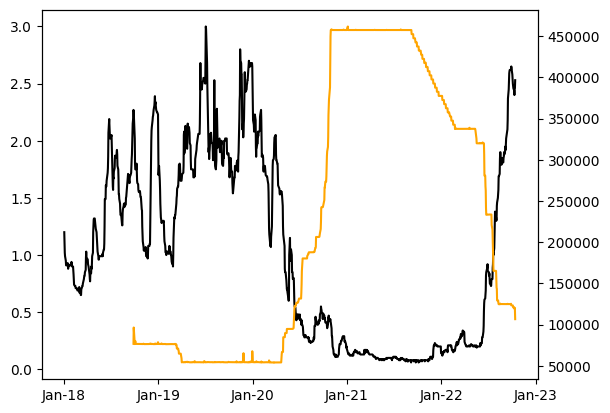

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(df['Date'],df['Hibor'],label='Hibor',color='black')
ax1 = ax.twinx()
ax1.plot(df1['Date'],df1['Balance'],label='Balance',color='orange')

import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

In [11]:
fig.savefig('foo.png')